<a href="https://colab.research.google.com/github/srilamaiti/spring_2023_w266_final_project_heesuk_iris_srila/blob/main/srila/roberta_ell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing new libraries**

In [1]:
!pip install nltk
!pip install wordcloud
!pip install transformers
!pip install emoji==0.6.0
!pip3 install tokenizers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49732 sha256=8a335669153e35c15fe0ff192fe98e7c5933643a9802e68e9c58f0ceedaa1f2b
  Stored in directory: /root/.cache/pip/wheels/70/2a/7f/1a0012c86b1061c6ee2ed9568b1f830f857a51e8

In [2]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 5.8 MB/s eta 0:00:00


In [3]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing libraries**

In [4]:
import transformers
print(f'transformers version: {transformers.__version__}')
from transformers import logging as hf_logging
from transformers import BertTokenizer, TFBertModel
from transformers import TFAutoModel, AutoTokenizer
hf_logging.set_verbosity_error()
import nltk
from nltk.tokenize import sent_tokenize
import spacy      
from spacy import displacy
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from transformers import RobertaTokenizer, TFRobertaModel
nltk.download('punkt')
ROBERTA_MODEL = "roberta-base"

# Other required libraries
import math
import os
import pandas as pd
import numpy as np
import re
import copy
import sys
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from skmultilearn.model_selection import iterative_train_test_split
import warnings
warnings.filterwarnings("ignore")

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.layer_utils import count_params
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import mae
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

import torch
import torch
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup

transformers version: 4.27.3


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **General functions**

## **Rounding Off to Custom Decimal Places**

In [34]:
def roundPartial(value, resolution):
    return round (value / resolution) * resolution

## **Set parameters**

In [35]:
def set_config_param(seed = 99):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', None)
    
    
set_config_param(20230214)

## **Plot loss and accuracy**

In [36]:
def plot_loss_accuracy(history, col_list):
    fig, ax = plt.subplots(2, 6, figsize=(16, 6), sharex='col', sharey='row')
    fig.tight_layout(pad=5.0)
    for idx, col in enumerate(col_list):

        ax[0, idx].plot(history[col + '_loss'], lw=2, color='darkgoldenrod')
        ax[0, idx].plot(history['val_' + col + '_loss'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[0, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[0, idx].set_xlabel('Epochs', size=10)
        ax[0, idx].set_title('Loss: ' + col)

        ax[1, idx].plot(history[col + '_accuracy'], lw=2, color='darkgoldenrod')
        ax[1, idx].plot(history['val_' + col + '_accuracy'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[1, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[1, idx].set_xlabel('Epochs', size=10)
        ax[1, idx].set_title('Accuracy: ' + col)

## **Text Encode**

In [37]:
def text_encode(texts, tokenizer, max_len):
    input_ids = []
    # token_type_ids = []
    attention_mask = []
    
    for text in texts:
        token = tokenizer(text, 
                          max_length = max_len, 
                          truncation = True, 
                          padding = 'max_length',
                          add_special_tokens = True)
        input_ids.append(token['input_ids'])
        # token_type_ids.append(token['token_type_ids'])
        attention_mask.append(token['attention_mask'])
    
    return np.array(input_ids), np.array(attention_mask)

## **Busild Base Model**

In [38]:
def build_base_model(model_layer, learning_rate, dense_dim = 6):
    
    #define inputs
    input_ids = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'input_ids')
    attention_masks = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'attention_masks')
    
    #insert BERT layer
    transformer_layer = model_layer([input_ids, attention_masks])
    
    #choose only last hidden-state
    x = transformer_layer[1]
    output = tf.keras.layers.Dense(dense_dim)(x)
    #output = tf.keras.layers.Rescaling(scale=4.0, offset=1.0)(x)
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)

    model.compile(tf.keras.optimizers.Adam(learning_rate), loss = loss,metrics = metrics)
    
    return model

## **Custom metric**

In [39]:
def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis = 1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis = -1, keepdims = True).numpy()[0]

# **Read input files**

In [40]:
input_train_df = pd.read_csv('train.csv')
input_test_df = pd.read_csv('test.csv')
label_cols = input_train_df.columns[2:]
orig_train_df = copy.deepcopy(input_train_df)
orig_train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


# **Model building**

In [41]:
set_config_param()

number_of_splits = 5
random_state = 2023
MAX_LEN = 512
epochs = 5
batch_size = 4
learning_rate = 1e-5
validation_split = .2
dropout = .1
number_of_hidden_layer = 1
hidden_layer_node_count = 64
trainable_flag = False
retrain_layer_count = 0

Original test data is very limited, there are only 3 records and it does not have labels to test. So we decided to repurpose the given train data to split into train, test and validation sets.

In [42]:
shuffle = np.random.permutation(np.arange(orig_train_df.shape[0]))
orig_train_df = orig_train_df.iloc[shuffle]
split=(0.8, 0.2)
splits = np.multiply(len(orig_train_df), split).astype(int)
df_train, df_test = orig_train_df[ : splits[0]], orig_train_df[splits[0] : ]

label_cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
y_train = np.array(df_train[label_cols], dtype = "float32")
y_test = np.array(df_test[label_cols], dtype = "float32")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_ids[0][0]',              
 el)                            thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

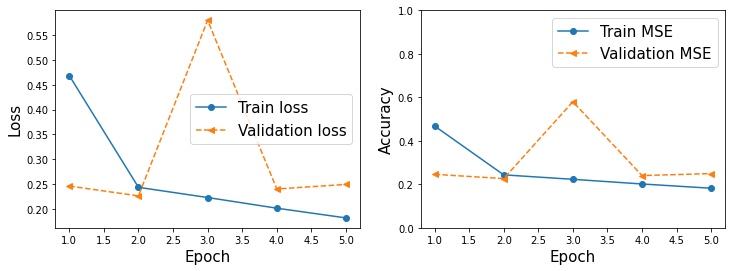

In [12]:
roberta_tokenizer = RobertaTokenizer.from_pretrained(ROBERTA_MODEL)
roberta_model = TFRobertaModel.from_pretrained(ROBERTA_MODEL)

train_input_ids, train_attention_masks = text_encode(df_train['full_text'], roberta_tokenizer, MAX_LEN)
test_input_ids, test_attention_masks = text_encode(df_test['full_text'], roberta_tokenizer, MAX_LEN)

loss = tf.keras.losses.mse
metrics = tf.keras.metrics.mse

ROBERTA_v1 = build_base_model(roberta_model, learning_rate = learning_rate)
ROBERTA_v1.summary()

history_v1 = ROBERTA_v1.fit((train_input_ids, train_attention_masks),
                            y_train,
                            batch_size = batch_size,        
                            epochs = epochs,
                            validation_split = validation_split
                            )

history_v1_df = pd.DataFrame(history_v1.history)
print(history_v1_df.T)

score_v1 = ROBERTA_v1.evaluate([test_input_ids, test_attention_masks], 
                               y_test
                              ) 
print(pd.DataFrame(score_v1))

predictions_v1 = ROBERTA_v1.predict([test_input_ids, test_attention_masks])
df_pred_v1 = pd.DataFrame(predictions_v1, columns=['pred_' + c for c in label_cols])
#print("Before transform...")
#print(df_pred_v1.head())
#print(df_pred_v1.tail())

for col in label_cols:
    df_pred_v1['transformed_pred_' + col] = df_pred_v1['pred_' + col].apply(lambda x : roundPartial(x, .5))
#print("After transform...")
print(df_pred_v1.head())
print(df_pred_v1.tail())

df_compare_v1= pd.merge(df_test, df_pred_v1, left_index = True, right_index = True)

x_arr = np.arange(len(history_v1_df['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, history_v1_df['loss'], '-o', label = 'Train loss')
ax.plot(x_arr, history_v1_df['val_loss'], '--<', label = 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size = 15)
ax.set_ylabel('Loss', size = 15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, history_v1_df['mean_squared_error'], '-o', label = 'Train MSE')
ax.plot(x_arr, history_v1_df['val_mean_squared_error'], '--<', label = 'Validation MSE')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size = 15)
ax.set_ylabel('Accuracy', size = 15)
ax.set_ylim(0,1)
plt.show()

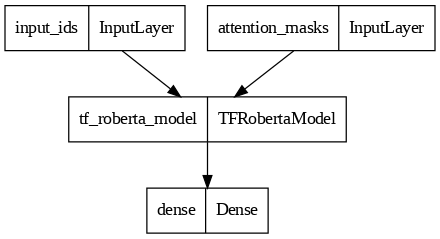

In [13]:
keras.utils.plot_model(ROBERTA_v1, show_shapes = False, show_dtype = False, show_layer_names = True, dpi = 90)

In [14]:
df_compare_v1

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,pred_cohesion,pred_syntax,pred_vocabulary,pred_phraseology,pred_grammar,pred_conventions,transformed_pred_cohesion,transformed_pred_syntax,transformed_pred_vocabulary,transformed_pred_phraseology,transformed_pred_grammar,transformed_pred_conventions
121,092BBD374359,"""Hey I had fun reading this book with you"" , y...",3.0,3.0,3.0,3.0,3.5,4.0,3.650707,3.500573,3.499491,3.665872,3.820677,3.418653,3.5,3.5,3.5,3.5,4.0,3.5
656,32B2D5592E1D,This teens manual I talk to talk about expecta...,2.5,2.0,3.0,2.5,2.0,2.0,2.563862,2.607243,2.731678,2.640018,2.735522,2.236219,2.5,2.5,2.5,2.5,2.5,2.0
130,0A1482CD6163,"I agree that "" A problem is a chance for you t...",4.0,4.0,4.5,4.0,4.5,4.5,3.619630,3.545725,3.621947,3.822901,3.862290,3.439463,3.5,3.5,3.5,4.0,4.0,3.5
133,0A4CDC286F8C,Imagine if students are trying to accomplish s...,2.5,2.5,2.5,3.0,3.0,2.5,3.608660,3.243901,3.139135,3.198885,3.102656,3.316845,3.5,3.0,3.0,3.0,3.0,3.5
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,3.311253,3.021276,3.123126,3.061491,2.919690,3.152968,3.5,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,04B3A4DD9460,I agree that talking to guidence is a good ide...,3.0,2.5,3.0,3.0,3.0,1.5,3.108329,2.938427,3.168968,3.271232,3.365569,2.984943,3.0,3.0,3.0,3.5,3.5,3.0
176,0D65AF80CDE7,It has been said that first impressions are al...,2.0,2.5,2.0,2.0,2.5,2.5,3.334834,3.174747,3.281576,3.310737,3.354534,3.347417,3.5,3.0,3.5,3.5,3.5,3.5
449,21EFAE02832D,I believe students should design summer projec...,2.0,2.0,3.0,3.0,2.0,3.0,2.646069,2.479709,2.664098,2.453227,2.487816,2.398774,2.5,2.5,2.5,2.5,2.5,2.5
55,04788D56AC58,Generic_City is the one place in this world i ...,3.5,3.0,3.0,3.0,3.5,3.0,3.074354,2.856786,2.872334,2.734375,2.722134,2.883787,3.0,3.0,3.0,2.5,2.5,3.0


In [15]:
pred_col_list = ['transformed_pred_' + col for col in label_cols]
MCRMSE(np.array(df_test[label_cols]), np.array(df_pred_v1[pred_col_list]))

0.4946256939087149

In [47]:
pd.set_option('display.max_rows', None)
pd.DataFrame(orig_train_df[label_cols].value_counts())

0
cohesion syntax vocabulary phraseology grammar conventions    
3.0      3.0    3.0        3.0         2.5     3.0          19
3.5      3.5    3.5        3.5         3.5     3.5          17
2.5      2.5    3.0        2.5         2.5     3.0          17
3.0      3.0    3.0        3.0         2.5     2.5          15
2.5      2.5    3.0        3.0         2.5     2.5          15
3.0      3.0    3.0        3.0         3.0     3.5          14
2.5      2.5    3.0        2.5         2.5     2.5          14
3.0      3.0    3.0        3.0         3.0     3.0          14
         2.5    3.0        2.5         2.5     2.5          13
3.5      3.0    3.5        3.5         3.5     3.5          12
                                               3.0          12
         3.5    3.5        3.0         3.0     3.5          12
2.5      2.5    2.5        2.5         2.5     2.5          11
3.0      2.5    3.0        2.5         2.5     3.0          11
3.5      3.0    3.0        3.0         3.0     3.0          11
3.0      3.5    3.5        3.5         3.0     3.5          11
         2.5    3.0        3.0         2.5     2.5          11
3.5      3.0    3.5        3.5         3.0     3.5          11
3.0      2.5    3.0        2.5         2.0     3.0          10
2.5      2.5    3.0        2.5         2.0     2.5          10
                2.5        2.5         2.0     2.0          10
3.5      3.5    3.5        3.5         3.0     3.5          10
3.0      3.0    3.0        3.0         3.0     2.5          10
                                       2.5     3.5          10
2.0      2.0    2.0        2.0         2.0     2.0          10
2.5      3.0    3.0        3.0         3.0     2.5          10
         2.5    3.0        3.0         2.5     3.0           9
2.0      2.0    2.0        2.0         2.0     2.5           9
2.5      3.0    3.0        3.0         2.5     3.0           9
         2.5    3.0        3.0         2.0     2.5           9
3.5      3.5    3.5        3.0         3.5     3.5           9
3.0      2.5    3.0        3.0         2.5     3.0           9
         3.5    3.5        3.5         3.5     3.0           9
3.5      3.5    3.5        3.5         3.5     3.0           9
3.0      3.0    3.0        3.5         3.5     3.0           9
4.0      3.5    4.0        4.0         3.5     3.5           9
3.0      3.5    3.0        3.5         3.5     3.5           9
2.5      2.5    2.5        2.0         2.0     2.0           9
                           2.5         2.0     2.5           8
3.0      3.0    3.0        2.5         2.0     2.5           8
         3.5    3.0        3.0         3.5     3.5           8
2.5      3.0    3.0        2.5         3.0     2.5           8
3.0      3.0    2.5        2.5         2.5     3.0           8
3.5      3.5    3.5        3.5         3.5     4.0           8
         3.0    3.0        3.0         3.5     3.5           8
3.0      3.0    3.0        2.5         2.5     3.0           8
3.5      3.0    3.5        3.0         3.0     3.0           8
2.5      3.0    3.0        2.5         3.0     3.0           8
3.5      3.5    3.5        3.5         4.0     3.0           8
         3.0    3.5        4.0         3.5     3.0           8
2.5      2.0    3.0        2.0         2.5     2.5           8
3.0      3.5    3.0        3.0         3.0     3.5           8
3.5      3.5    4.0        4.0         3.5     3.5           8
2.5      2.0    2.5        2.0         2.0     2.5           8
3.0      2.5    3.0        2.5         2.0     2.5           8
         3.0    3.0        3.5         3.0     3.0           8
3.5      3.5    3.0        3.0         3.5     3.0           8
3.0      3.0    3.0        3.0         3.5     3.0           8
2.5      2.0    3.0        2.5         2.0     2.5           7
3.5      3.5    3.0        3.5         3.5     3.0           7
3.0      3.5    3.5        3.5         3.0     3.0           7
         3.0    3.5        3.5         3.0     3.5           7
3.5      4.0    4.0        4.

# **Clustering**

[0 0 0 ... 2 0 1]
within-cluster SSE: 9444.03


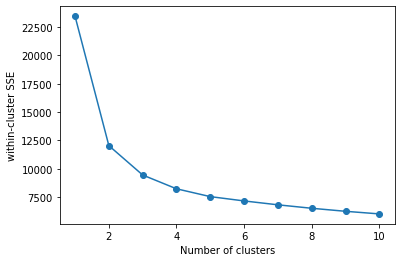

In [56]:
# sklearn
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# distances
from scipy.spatial.distance import pdist, squareform

# data visualization
from matplotlib import cm
import matplotlib.pyplot as plt
from IPython.display import Image

# others
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
from scipy.cluster.hierarchy import linkage

df_rating = copy.deepcopy(orig_train_df[label_cols])
rating_values_array = np.array(df_rating)
#print(rating_values_array)

# standardize
sc = StandardScaler()
rating_values_array_std = sc.fit(rating_values_array).transform(rating_values_array)

# create an instance of KMeans class using the scikit-learn package
km = KMeans(n_clusters=3,
           init='random',
           #init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

# predict k-means classes
y_km = km.fit_predict(rating_values_array_std)

# print cluster predictions
print(y_km)
print('within-cluster SSE: %.2f' % km.inertia_)
# initialize within-cluster SSE list
wc_SSE = []

# fit KMeans models with different numbers of clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i,           
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=1e-04,
                random_state=0)
    km.fit(rating_values_array_std)
    wc_SSE.append(km.inertia_)
# plot within-cluster SSE for each k
plt.plot(range(1,11), wc_SSE, marker='o');
plt.xlabel('Number of clusters');
plt.ylabel('within-cluster SSE');

In [60]:
# create an instance of KMeans class using the scikit-learn package
km_1 = KMeans(n_clusters=5,
           init='random',
           #init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

# predict k-means classes
y_km_1 = km_1.fit_predict(rating_values_array_std)

# print cluster predictions
print(y_km_1)
print('within-cluster SSE: %.2f' % km_1.inertia_)


[4 4 4 ... 0 0 3]
within-cluster SSE: 7534.42


We can see that an increase in *k* is associated with a decrease in the within-cluster SSE. 

This is because the examples are closer to the centroid they assigned to.

**The elbow solution**: the optimal *k* is where the within-cluster SSE begings to increase most rapidly.

For this particular example the elbow is at k=5 so we started with a good number of clusters.

Silhoutte plots

A graphical tool to plot a measure of how tightly grouped the examples in the clusters are.

To calculcate the silhoutte coefficient of a single example, apply 3 steps:
- calculate **cluster cohesion**, $a_i$ = average distance between an example, $x_i$, and all other points in the same cluster.
- calculate **cluster separation**, $b_i$, from the next closest cluster = average distance between an example, $x_i$ and all examples in the nearest cluster.
- calculate **the silhouette**, $s_i = \frac{b_i - a_i}{max(b_i,  a_i)}$.


In [58]:
km = KMeans(n_clusters=3,
           #init='random',
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

# predict k-means classes
y_km = km.fit_predict(rating_values_array_std)

# find silhouette values
silhouette_vals = silhouette_samples(rating_values_array_std, y_km, metric='euclidean')
print('Head of silhouette vals:\n', silhouette_vals[:150])
print('\nMinimum value:', min(silhouette_vals),
      '\nMaximum value:', max(silhouette_vals), '\n')

Head of silhouette vals:
 [ 0.28008293  0.20025086  0.3562011   0.15476507  0.06526698  0.17696199
  0.4010731   0.2786253   0.07251549  0.34096478  0.27893663  0.340989
  0.25023971  0.41372026  0.37955429  0.31455017  0.45064403  0.07499629
  0.07378798  0.47288495  0.45571     0.2673619   0.31649927  0.39341529
  0.42576402  0.40058297  0.21467582  0.09572086  0.08049814  0.08711427
  0.40483457  0.35885502  0.27350192  0.29961539  0.0656381   0.40228448
  0.2615173   0.3497991   0.34554192  0.44336926  0.25562026  0.21081445
  0.0830824   0.41871904  0.34326084  0.47388619  0.26589427  0.27025781
  0.08956059  0.31842859  0.23362969  0.19748514  0.12171146  0.45759416
  0.45317018 -0.01296326  0.40510175  0.25622362  0.23041565  0.21547519
  0.21941705  0.23223783  0.10142903  0.06907647  0.33440279  0.49709173
  0.27538879  0.39910015  0.31455017  0.45317018  0.0830824   0.17329389
  0.29673193  0.26384554  0.14374     0.2990891   0.50791643  0.03158275
  0.3166081   0.49471512  0

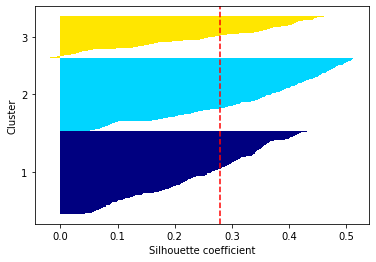

In [59]:
# grab cluster labels and length
cluster_labels = np.unique(y_km)
n_clusters = len(cluster_labels)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    # grab silhouette values for each cluster
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    # plot y and x axes
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
# plot average value across clusters    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster');
plt.xlabel('Silhouette coefficient');

In [62]:
km_1 = KMeans(n_clusters=5,
           #init='random',
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

# predict k-means classes
y_km_1 = km_1.fit_predict(rating_values_array_std)

# find silhouette values
silhouette_vals = silhouette_samples(rating_values_array_std, y_km_1, metric='euclidean')
print('Head of silhouette vals:\n', silhouette_vals[:150])
print('\nMinimum value:', min(silhouette_vals),
      '\nMaximum value:', max(silhouette_vals), '\n')

Head of silhouette vals:
 [ 0.14578179  0.08206113  0.12560539  0.06225084  0.08959444  0.25303423
  0.11275893  0.281238    0.04577192  0.09797472  0.30121491  0.1034879
  0.08683927  0.01761376  0.39065372  0.27546814  0.11222534  0.08651826
  0.2075464   0.38970616  0.13201308  0.26576124  0.13550804  0.16717157
  0.09759891  0.22644531  0.01240488  0.18538388  0.17297879  0.23054615
  0.41755835  0.13614974  0.07243708  0.21375458  0.17571113  0.23016248
  0.1483057   0.17368224  0.02073509  0.15213342  0.09800914  0.08354585
  0.08342969  0.25254225  0.12310751  0.20916207  0.30887273  0.14502048
  0.07691394  0.22685582  0.32194692  0.07273939  0.1264859   0.14883449
  0.15678815  0.16882606  0.1974845   0.05181337  0.1876019   0.28765389
  0.08589945  0.06102956  0.22488075  0.16480752  0.13969353  0.3839527
  0.16846899  0.21290761  0.27546814  0.15678815  0.08342969  0.28453433
  0.10541611  0.02402763  0.06924824  0.14270077  0.32597715  0.26798771
  0.16923799  0.27079293  0

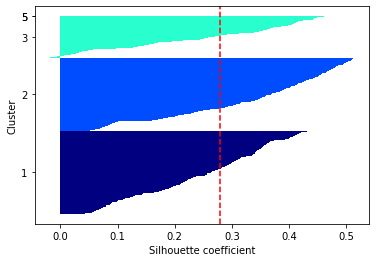

In [61]:
# grab cluster labels and length
cluster_labels = np.unique(y_km_1)
n_clusters = len(cluster_labels)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    # grab silhouette values for each cluster
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    # plot y and x axes
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
# plot average value across clusters    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster');
plt.xlabel('Silhouette coefficient');

Clustering models with a high silhouette coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

In [70]:
km_2 = KMeans(n_clusters=2,
           #init='random',
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

# predict k-means classes
y_km_2 = km_2.fit_predict(rating_values_array_std)

# find silhouette values
silhouette_vals = silhouette_samples(rating_values_array_std, y_km_2, metric='euclidean')
print('Head of silhouette vals:\n', silhouette_vals[:150])
print('\nMinimum value:', min(silhouette_vals),
      '\nMaximum value:', max(silhouette_vals), '\n')

Head of silhouette vals:
 [0.04858165 0.18933428 0.31468998 0.17125089 0.30590103 0.40559271
 0.53656841 0.52640801 0.25237981 0.48136693 0.53291986 0.33724302
 0.249431   0.54318769 0.4289812  0.4963425  0.53803798 0.29144712
 0.38006138 0.51228808 0.53716805 0.52453758 0.16692533 0.53167696
 0.51783992 0.20307212 0.34832793 0.45320859 0.41447306 0.4192095
 0.45403077 0.50413123 0.25387255 0.48448226 0.34400887 0.20613253
 0.46375789 0.18671115 0.50697575 0.5327764  0.23765269 0.38450668
 0.29749805 0.48962606 0.31637725 0.54104582 0.53304265 0.03642778
 0.33328981 0.50067783 0.47803474 0.18237868 0.4435693  0.53984312
 0.57654718 0.44172587 0.50238016 0.25408136 0.40635043 0.45811673
 0.19189189 0.37743881 0.41763789 0.35957492 0.4788816  0.54085606
 0.45174622 0.22285852 0.4963425  0.57654718 0.29749805 0.48028004
 0.26964456 0.41492034 0.31272922 0.49877604 0.55789274 0.51135986
 0.06724128 0.55614364 0.06534369 0.06724128 0.37406501 0.39983472
 0.56228509 0.58256543 0.40108812 0.4

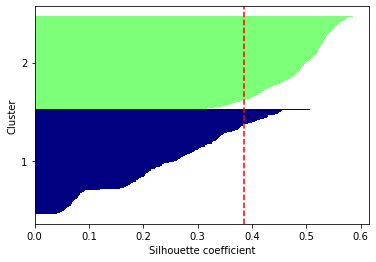

In [71]:
# grab cluster labels and length
cluster_labels = np.unique(y_km_2)
n_clusters = len(cluster_labels)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    # grab silhouette values for each cluster
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    # plot y and x axes
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
# plot average value across clusters    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster');
plt.xlabel('Silhouette coefficient');

In [21]:
for kfold, (train_indices, test_indices) in enumerate(StratifiedKFold(n_splits =  number_of_splits, 
                                                                      shuffle = True, 
                                                                      random_state = random_state
                                                                     ).split(orig_train_df['full_text'].values.tolist(),
                                                                             orig_train_df[label_cols].values.tolist(),
                                                                             groups = None
                                                                            )
                                     ):
    print(f"k-fold : {kfold + 1}, length of train data : {len(train_indices)}")
        

ValueError: ignored